<a href="https://colab.research.google.com/github/aivrm/ai/blob/main/GD_4_3_tf_image_Random_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

In [2]:
tf.__version__

'2.8.2'

In [3]:
keras.__version__

'2.8.0'

In [4]:
np.__version__

'1.21.6'

In [5]:
#plt.__version__
#AttributeError: module 'matplotlib.pyplot' has no attribute '__version__'

In [6]:
tfds.__version__

'4.6.0'

In [7]:
(ds_train, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
)
# with_info=True 삭제했더니,
# shuffle_files=True 라인에서 에러 발생함.

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/12000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/stanford_dogs/0.2.0.incomplete7NRWV8/stanford_dogs-train.tfrecord*...:   0%|  …

Generating test examples...:   0%|          | 0/8580 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/stanford_dogs/0.2.0.incomplete7NRWV8/stanford_dogs-test.tfrecord*...:   0%|   …

Dataset stanford_dogs downloaded and prepared to ~/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


In [8]:
# 위에서 with_info=True
# 일 때 값이 넘어옴.
ds_info

tfds.core.DatasetInfo(
    name='stanford_dogs',
    full_name='stanford_dogs/0.2.0',
    description="""
    The Stanford Dogs dataset contains images of 120 breeds of dogs from around
    the world. This dataset has been built using images and annotation from
    ImageNet for the task of fine-grained image categorization. There are
    20,580 images, out of which 12,000 are used for training and 8580 for
    testing. Class labels and bounding box annotations are provided
    for all the 12,000 images.
    """,
    homepage='http://vision.stanford.edu/aditya86/ImageNetDogs/main.html',
    data_path='~/tensorflow_datasets/stanford_dogs/0.2.0',
    file_format=tfrecord,
    download_size=778.12 MiB,
    dataset_size=744.72 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=120),
        'objects': Sequence({
           

In [9]:
ds_train

<PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'image/filename': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'objects': {'bbox': TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)}}>

In [10]:
ds_test

<PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'image/filename': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'objects': {'bbox': TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)}}>

In [11]:
df = tfds.as_dataframe(ds_train, ds_info)
df.head()

image  \
0  [[[235, 225, 223], [236, 226, 224], [237, 227,...   
1  [[[219, 228, 237], [220, 229, 238], [220, 229,...   
2  [[[133, 130, 113], [150, 149, 131], [184, 188,...   
3  [[[243, 242, 247], [243, 242, 247], [243, 242,...   
4  [[[50, 46, 35], [50, 46, 35], [52, 48, 37], [5...   

                                      image/filename  label  \
0  b'Images/n02110185-Siberian_husky/n02110185_15...     99   
1  b'Images/n02106550-Rottweiler/n02106550_10714....     83   
2  b'Images/n02105855-Shetland_sheepdog/n02105855...     79   
3     b'Images/n02111129-Leonberg/n02111129_306.jpg'    103   
4  b'Images/n02088466-bloodhound/n02088466_10831....     12   

                                        objects/bbox  
0            [[0.428, 0.25363827, 0.65, 0.44490644]]  
1    [[0.09471366, 0.1462141, 0.938326, 0.74934727]]  
2        [[0.07777778, 0.01875, 0.99444443, 0.9625]]  
3  [[0.472, 0.5435435, 0.934, 0.993994], [0.548, ...  
4                 [[0.024, 0.12, 0.99733335, 0.998]]

In [12]:
# image | image/filename | label | objects/bbox
# 4 가지로 구성되어 있음.
df.info

<bound method DataFrame.info of                                                    image  \
0      [[[235, 225, 223], [236, 226, 224], [237, 227,...   
1      [[[219, 228, 237], [220, 229, 238], [220, 229,...   
2      [[[133, 130, 113], [150, 149, 131], [184, 188,...   
3      [[[243, 242, 247], [243, 242, 247], [243, 242,...   
4      [[[50, 46, 35], [50, 46, 35], [52, 48, 37], [5...   
...                                                  ...   
11995  [[[188, 76, 36], [187, 75, 35], [185, 73, 33],...   
11996  [[[130, 68, 19], [137, 77, 27], [159, 98, 53],...   
11997  [[[23, 19, 10], [23, 19, 10], [23, 19, 10], [2...   
11998  [[[5, 4, 0], [5, 4, 0], [5, 4, 0], [5, 4, 0], ...   
11999  [[[82, 100, 38], [78, 96, 36], [71, 84, 28], [...   

                                          image/filename  label  \
0      b'Images/n02110185-Siberian_husky/n02110185_15...     99   
1      b'Images/n02106550-Rottweiler/n02106550_10714....     83   
2      b'Images/n02105855-Shetland_sheepdog/n0

In [13]:
# 총 1,2000건
len(df.image)

12000

In [14]:
type(df.image)

pandas.core.series.Series

In [15]:
type(df.label)

pandas.core.series.Series

In [16]:
# rng = range(0, len(df.image))
rng = range(0, 10)
for i in rng:
    print(i,":", df.image[i].shape, df.label[i])

0 : (500, 481, 3) 99
1 : (454, 383, 3) 83
2 : (180, 160, 3) 79
3 : (500, 333, 3) 103
4 : (375, 500, 3) 12
5 : (375, 500, 3) 21
6 : (500, 375, 3) 91
7 : (333, 500, 3) 29
8 : (333, 500, 3) 32
9 : (500, 484, 3) 115


In [17]:
type(df.image[0])

numpy.ndarray

In [18]:
import PIL
PIL.__version__

'7.1.2'

In [19]:
from PIL import Image
Image.__version__

'7.1.2'

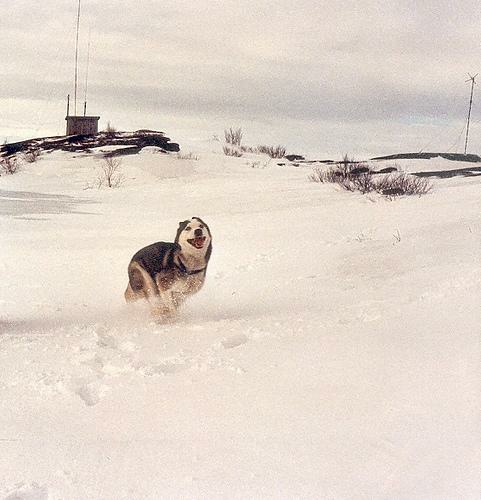

In [20]:
img = Image.fromarray(df.image[0], 'RGB')
img

In [21]:
plt.figure(figsize=(17,10))

<Figure size 1224x720 with 0 Axes>

<Figure size 1224x720 with 0 Axes>

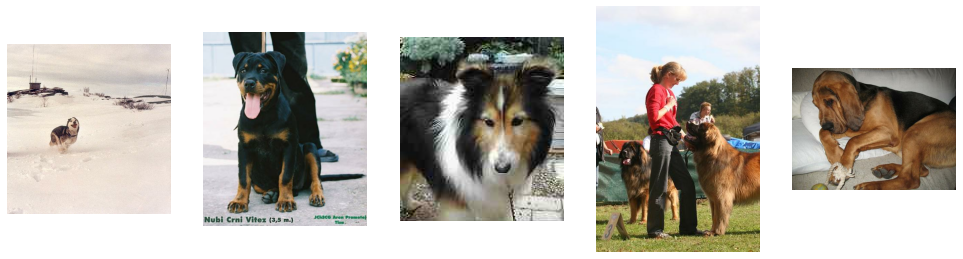

In [22]:
# Original
plt.figure(figsize=(17,10))
for i in range(5):
    plt.subplot(1,5, i+1)
    plt.imshow(df.image[i])
    plt.axis('off')
plt.show()

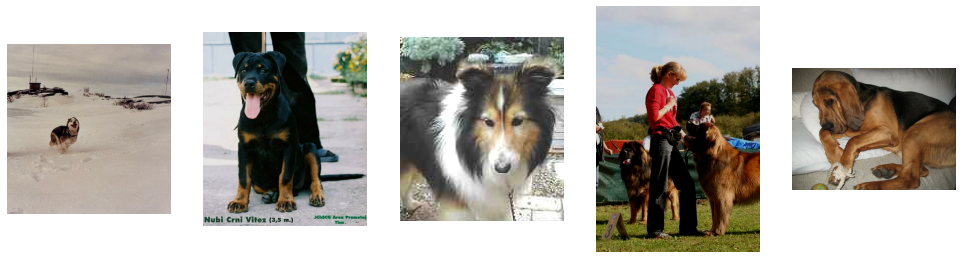

In [23]:
# tf.image.random_brightness()
# https://www.tensorflow.org/api_docs/python/tf/image/random_brightness
plt.figure(figsize=(17,10))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = tf.image.random_brightness(df.image[i], max_delta=0.2)
    plt.imshow(img)
    plt.axis('off')
plt.show()

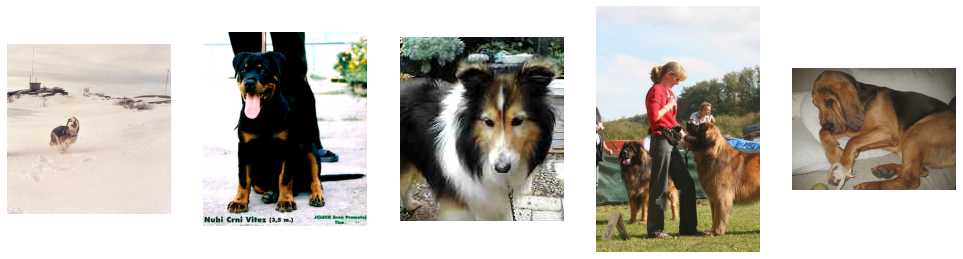

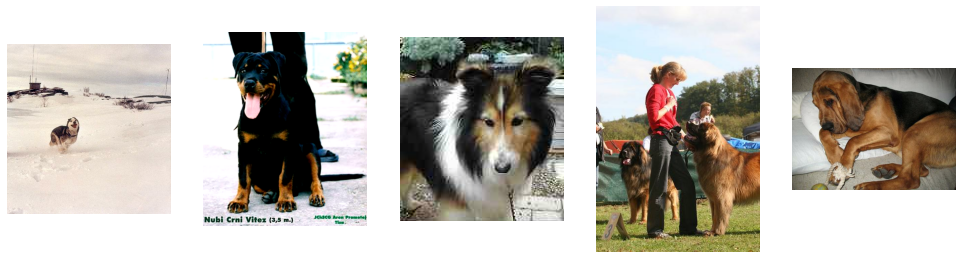

In [24]:
# tf.image.random_contrast()
# https://www.tensorflow.org/api_docs/python/tf/image/random_contrast
plt.figure(figsize=(17,10))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = tf.image.random_contrast(df.image[i], lower=0.5, upper=1.5)
    plt.imshow(img)
    plt.axis('off')
plt.show()

plt.figure(figsize=(17,10))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = tf.image.random_contrast(df.image[i], lower=0.2, upper=1.8)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [25]:
df.image[0]

array([[[235, 225, 223],
        [236, 226, 224],
        [237, 227, 225],
        ...,
        [240, 230, 228],
        [223, 214, 209],
        [223, 209, 206]],

       [[231, 221, 219],
        [233, 223, 221],
        [236, 226, 224],
        ...,
        [226, 216, 214],
        [214, 204, 202],
        [219, 208, 204]],

       [[229, 220, 215],
        [231, 222, 217],
        [233, 224, 219],
        ...,
        [221, 211, 209],
        [219, 209, 207],
        [232, 221, 217]],

       ...,

       [[238, 227, 223],
        [246, 235, 231],
        [240, 229, 225],
        ...,
        [241, 233, 231],
        [244, 236, 234],
        [231, 225, 227]],

       [[244, 233, 229],
        [247, 236, 232],
        [240, 229, 225],
        ...,
        [243, 235, 233],
        [245, 237, 235],
        [234, 228, 230]],

       [[243, 232, 228],
        [242, 231, 227],
        [237, 226, 222],
        ...,
        [244, 236, 234],
        [246, 238, 236],
        [239, 233, 235]]

In [26]:
print(df.image[0].shape)
print(df.image[1].shape)
print(df.image[2].shape)

(500, 481, 3)
(454, 383, 3)
(180, 160, 3)


In [27]:
print(df.image[0].shape[0])
print(df.image[0].shape[1])
print(df.image[0].shape[2])

500
481
3


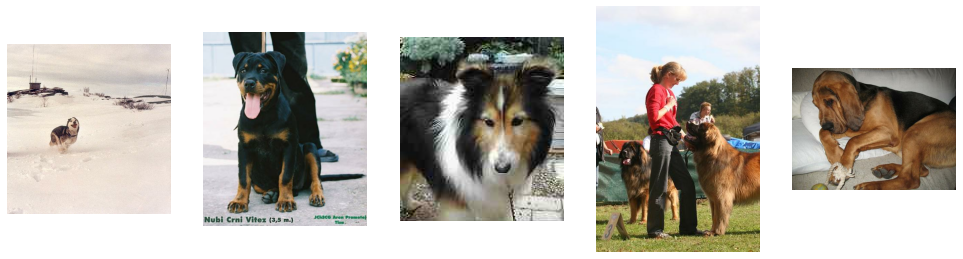

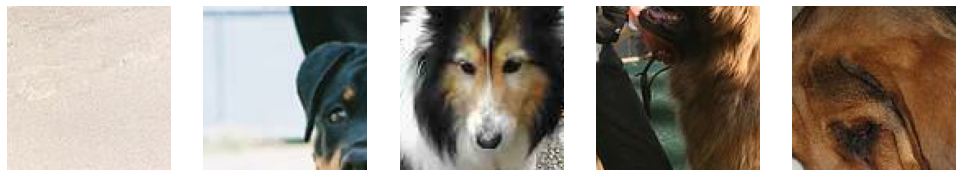

In [29]:
# tf.image.random_crop()
# https://www.tensorflow.org/api_docs/python/tf/image/random_crop

plt.figure(figsize=(17,10))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = tf.image.random_crop(value=df.image[i], size=(df.image[i].shape[0], df.image[i].shape[1], 3), seed=None, name=None)
    plt.imshow(img)
    plt.axis('off')
plt.show()

plt.figure(figsize=(17,10))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = tf.image.random_crop(value=df.image[i], size=(100, 100, 3), seed=None, name=None)
    plt.imshow(img)
    plt.axis('off')
plt.show()


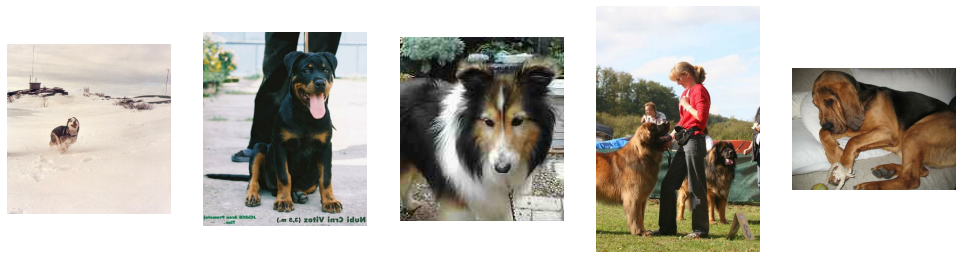

In [30]:
# tf.image.random_flip_left_right
# https://www.tensorflow.org/api_docs/python/tf/image/random_flip_left_right
plt.figure(figsize=(17,10))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = tf.image.random_flip_left_right(df.image[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()

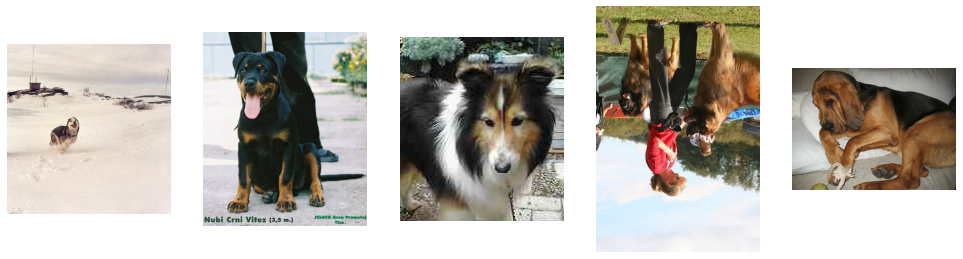

In [31]:
# tf.image.random_flip_up_down
# https://www.tensorflow.org/api_docs/python/tf/image/random_flip_up_down
plt.figure(figsize=(17,10))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = tf.image.random_flip_up_down(df.image[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()

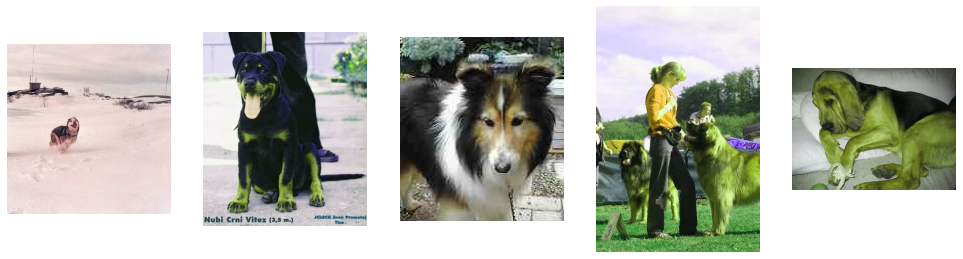

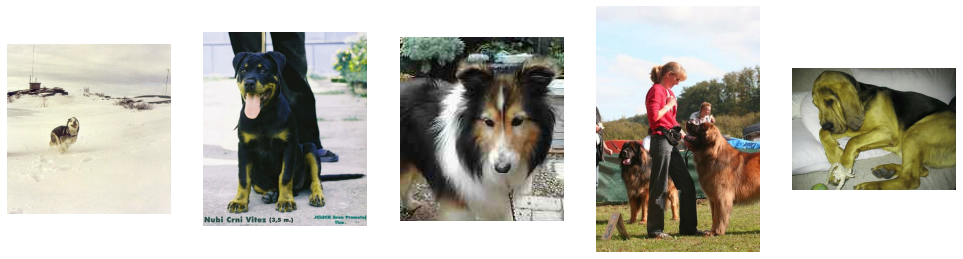

In [32]:
# tf.image.random_hue
# https://www.tensorflow.org/api_docs/python/tf/image/random_hue
plt.figure(figsize=(17,10))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = tf.image.random_hue(df.image[i], 0.2)
    plt.imshow(img)
    plt.axis('off')
plt.show()

plt.figure(figsize=(17,10))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = tf.image.random_hue(df.image[i], 0.08)
    plt.imshow(img)
    plt.axis('off')
plt.show()

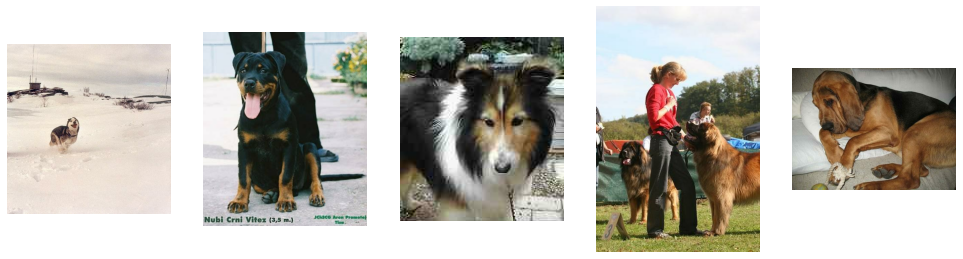

In [33]:
# tf.image.random_jpeg_quality
# https://www.tensorflow.org/api_docs/python/tf/image/random_jpeg_quality
plt.figure(figsize=(17,10))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = tf.image.random_jpeg_quality(df.image[i], 75, 95)
    plt.imshow(img)
    plt.axis('off')
plt.show()

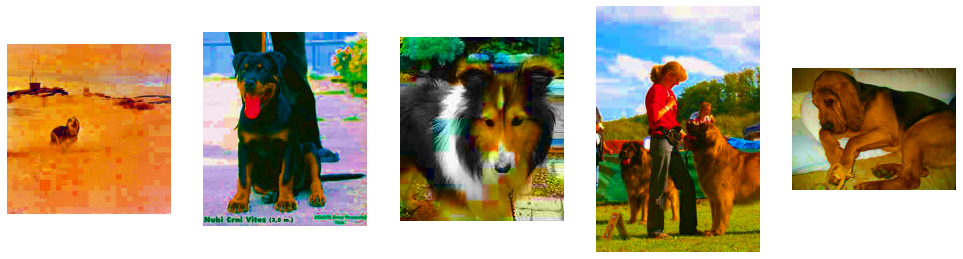

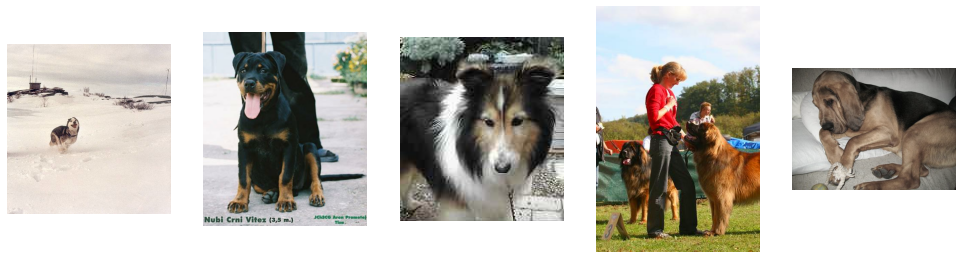

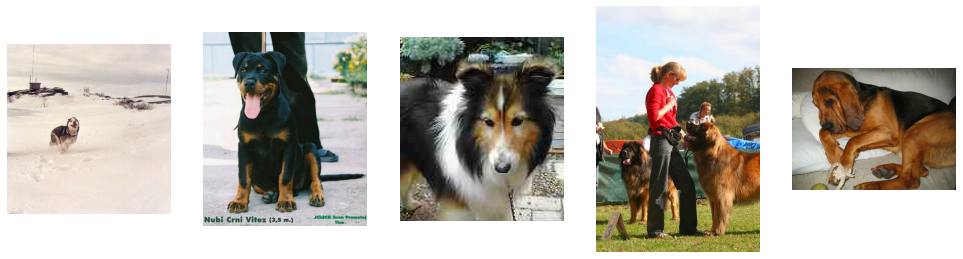

In [34]:
# tf.image.random_saturation
# https://www.tensorflow.org/api_docs/python/tf/image/random_saturation
plt.figure(figsize=(17,10))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = tf.image.random_saturation(df.image[i], 5, 10)
    plt.imshow(img)
    plt.axis('off')
plt.show()

plt.figure(figsize=(17,10))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = tf.image.random_saturation(df.image[i], lower=0.5, upper=1.5)
    plt.imshow(img)
    plt.axis('off')
plt.show()

plt.figure(figsize=(17,10))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = tf.image.random_saturation(df.image[i], lower=0.8, upper=1.3)
    plt.imshow(img)
    plt.axis('off')
plt.show()

---
tf.image.resize 에서 문제가 발생하는 장면을 발견함.

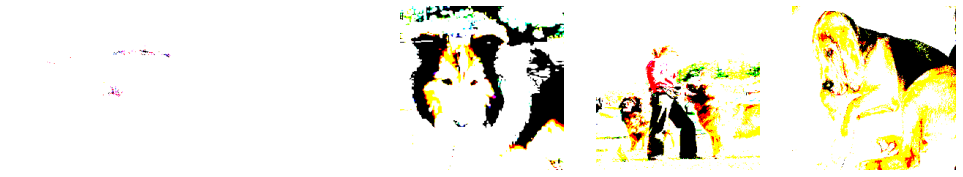

In [35]:
def augment(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.resize(image, [224, 224])
    #image = tf.clip_by_value(image, 0, 1)  # 0~1 사이로 값을 지정.
    # https://www.tensorflow.org/api_docs/python/tf/clip_by_value
    return image

plt.figure(figsize=(17,10))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = augment(df.image[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()

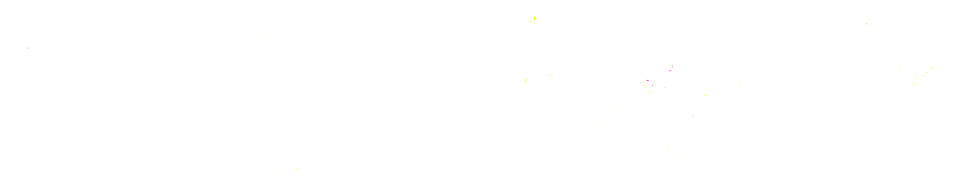

In [36]:
def augment2(image):
    image = tf.image.central_crop(image, np.random.uniform(0.50, 1.00))
    image = tf.image.resize(image, [224, 224])
    #image = tf.clip_by_value(image, 0, 1)
    return image

plt.figure(figsize=(17,10))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = augment2(df.image[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()

---
tf.image.resize 에 옵션 추가 및 비교

* antialias=True, method='nearest' 옵션 두 개 추가

In [37]:
# 부동소수점으로 바뀌었음을 알 수 있다.
# 소숫점 5자리 값 자체는 이후에도 동일하였음.
(tf.image.resize(df.image[0], [224, 224])).numpy()
#tf_resize(df.image[0]).numpy()

array([[[233.46278, 223.46278, 221.46278],
        [237.54909, 227.54909, 225.54909],
        [237.61597, 227.61597, 225.61597],
        ...,
        [220.57365, 210.57365, 208.57365],
        [227.4418 , 217.4418 , 215.4418 ],
        [218.7687 , 208.0715 , 204.72176]],

       [[235.95987, 226.95987, 221.95987],
        [236.61172, 227.61172, 222.61172],
        [234.41528, 225.41528, 220.41528],
        ...,
        [214.04776, 204.04776, 202.04776],
        [223.1739 , 213.1739 , 211.1739 ],
        [222.52399, 212.45927, 210.32985]],

       [[237.07065, 228.07065, 222.90994],
        [235.01553, 226.01553, 220.85481],
        [233.04076, 224.04076, 218.88004],
        ...,
        [219.82161, 209.82161, 207.82161],
        [220.93364, 210.93364, 208.93364],
        [226.84761, 217.70033, 215.70033]],

       ...,

       [[244.08466, 233.08466, 227.08466],
        [237.68475, 226.68475, 220.68475],
        [235.14896, 224.14896, 218.14896],
        ...,
        [242.     , 232.  

In [38]:
# 소숫점 이하 값은 달라지는 것이 발견됨.
(tf.image.resize(df.image[0], [224, 224], antialias=True)).numpy()

array([[[233.46269, 223.65936, 221.06932],
        [236.68134, 226.87802, 224.28793],
        [236.98643, 227.18312, 224.59306],
        ...,
        [220.7481 , 210.7481 , 208.7481 ],
        [224.7957 , 214.8305 , 212.72607],
        [222.33566, 211.66382, 208.54507]],

       [[236.24284, 227.1662 , 222.39615],
        [236.80847, 227.73184, 222.96178],
        [235.24994, 226.1733 , 221.40324],
        ...,
        [218.639  , 208.63899, 206.639  ],
        [221.69612, 211.69614, 209.69612],
        [222.33488, 212.20915, 209.93251]],

       [[237.55469, 228.55469, 222.915  ],
        [235.83307, 226.83307, 221.19334],
        [233.70175, 224.70177, 219.06204],
        ...,
        [221.65039, 211.65038, 209.65036],
        [222.21541, 212.22684, 210.22113],
        [226.38315, 216.99443, 215.04039]],

       ...,

       [[241.65947, 230.65947, 224.71921],
        [241.75438, 230.7544 , 224.81412],
        [239.58263, 228.58261, 222.64236],
        ...,
        [241.85704, 231.91

In [39]:
# method='nearest' 옵션을 추가하였더니,
# uint8로 바뀌었고, 이미지 색상이 정상적으로 돌아왔음.
(tf.image.resize(df.image[0], [224, 224], antialias=True, method='nearest')).numpy()

array([[[233, 223, 221],
        [238, 228, 226],
        [239, 229, 227],
        ...,
        [221, 211, 209],
        [224, 214, 212],
        [214, 204, 202]],

       [[237, 228, 223],
        [237, 228, 223],
        [234, 225, 220],
        ...,
        [212, 202, 200],
        [225, 215, 213],
        [226, 216, 214]],

       [[237, 228, 223],
        [235, 226, 221],
        [233, 224, 219],
        ...,
        [219, 209, 207],
        [220, 210, 208],
        [231, 221, 219]],

       ...,

       [[244, 233, 227],
        [236, 225, 219],
        [235, 224, 218],
        ...,
        [242, 232, 230],
        [242, 232, 230],
        [243, 233, 231]],

       [[240, 229, 225],
        [239, 228, 224],
        [251, 240, 236],
        ...,
        [244, 236, 234],
        [240, 232, 230],
        [243, 235, 233]],

       [[247, 236, 232],
        [229, 218, 214],
        [227, 216, 212],
        ...,
        [240, 232, 230],
        [240, 232, 230],
        [245, 237, 235]]

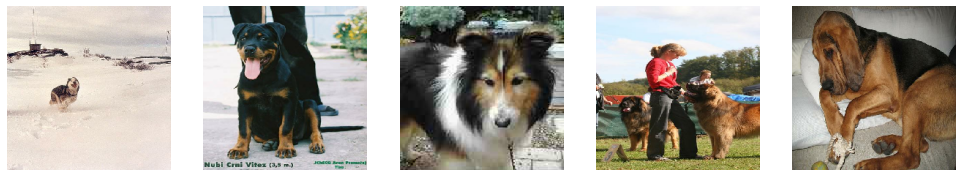

In [40]:
# https://www.tensorflow.org/api_docs/python/tf/image/resize
def tf_resize(image):
    image = tf.image.resize(image, [224, 224], antialias=True, method='nearest')
    return image

plt.figure(figsize=(17,10))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = tf_resize(df.image[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()

---
수정된 augment 와 augment2

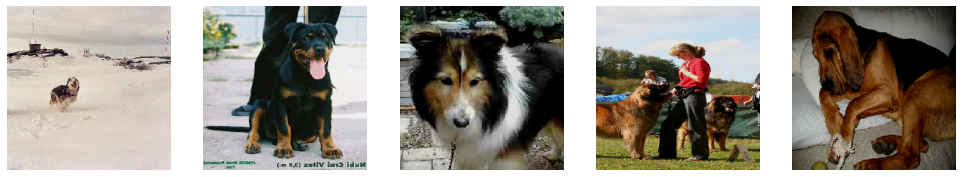

In [41]:
# https://www.tensorflow.org/api_docs/python/tf/image/resize
def augment(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.resize(image, [224, 224], antialias=True, method='nearest')
    #image = tf.clip_by_value(image, 0, 1)  # 0~1 사이로 값을 지정.
    return image

plt.figure(figsize=(17,10))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = augment(df.image[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()

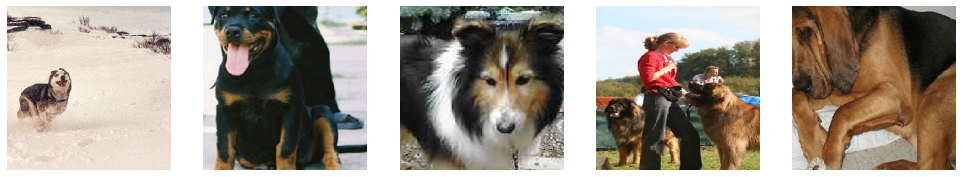

In [42]:
# https://www.tensorflow.org/api_docs/python/tf/image/resize
def augment2(image):
    image = tf.image.central_crop(image, np.random.uniform(0.50, 1.00))
    image = tf.image.resize(image, [224, 224], antialias=True, method='nearest')
    #image = tf.clip_by_value(image, 0, 1)
    return image

plt.figure(figsize=(17,10))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = augment2(df.image[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()

### 회고

tensorflow_datasets 의 stanford_dogs 데이터셋을 보면,<br>
아래 4가지의 정보로 구성되어 있으며, 12000건 임.<br>
(image | image/filename | label | objects/bbox)<br>

tf.image의 각 메서드가 어떻게 동작하는지 알기가 힘들었는데,<br>
tensorflow_datasets 에서는 pandas의 DataFrame 형식으로 데이터를 빼낼 수 있었으며,<br>
이미지는 numpy 의 array 로 사용할 수 있었음.<br>
이를 입력으로 하여, 각 메서드 적용시, 어떻게 바뀌는지 볼 수 있었음.<br>

대부분은 큰 문제가 보이지 않았으나,<br>
tf.image.resize 에서는 색상이 이상하게 변하는데,<br>
사이즈만 바뀌는 것이 아니라, 각 픽셀의 값이,<br>
int32 에서 float32로 바뀌는 특성이 있었음.<br>
값 자체도 PyTorch 등과는 다르다고 하며,<br>
일반적인 것으로 맞추기 위해서는, antialias=True 옵션을 주어야 한다고 함.<br>

위에서 antialias=True 를 주어도 각 픽셀의 값은 float32 이었다.<br>
matplotlib.pyplot 에서 자연적인 색상으로 보기 위해서는 integer가 되어야 하며,<br>
tf.image.resize 에서 method='nearest' 옵션을 주었더니,<br>
사이즈가 바뀌면서, int32로 되고, 색상도 정상적으로 보여졌다.

데이터 처리에서는  antialias=True 옵션만 주고,<br>
시각화를 할 때는 method='nearest' 옵션을 주면 될 것임.<br>